# PyCaret 2 Clustering Example
This notebook is created using PyCaret 2.0. Last updated : 28-07-2020

In [2]:
# check version
from pycaret.utils import version
version()

pycaret-nightly-0.39


# 1. Loading Dataset

In [3]:
from pycaret.datasets import get_data
data = get_data('public_health')

Country Name      1995      1996      1997      1998  \
0                      Arab World  2.004868  2.014602  2.071309  2.177712   
1          Caribbean small states  2.801518  2.856684  2.997157  2.989451   
2  Central Europe and the Baltics  4.678528  4.753209  4.604574  4.499988   
3      Early-demographic dividend  2.203164  2.156632  2.227311  2.364100   
4             East Asia & Pacific  4.429090  4.203152  4.244351  4.453984   

       1999      2000      2001      2002      2003  ...      2005      2006  \
0  2.331000  2.333596  2.588751  2.540238  2.450415  ...  2.134281  2.133038   
1  2.767858  2.826752  2.679969  2.888693  2.740593  ...  2.629580  2.650900   
2  4.679082  4.539711  4.666272  4.900196  5.100249  ...  4.970861  4.841450   
3  2.454394  2.450555  2.527081  2.347702  2.363263  ...  2.337347  2.369884   
4  4.626920  4.688849  4.684790  4.613537  4.635098  ...  4.566215  4.367146   

       2007      2008      2009      2010      2011      2012      2013  \
0  2.166872  2.101233  2.830067  2.489631  2.539570  2.711262  2.895427   
1  2.790665  2.822913  3.408651  3.264064  3.087653  3.314303  3.318432   
2  4.809057  5.054785  5.394921  5.284380  5.096212  5.041317  5.029266   
3  2.385251  2.405126  2.701260  2.507131  2.495491  2.497340  2.586701   
4  4.297394  4.434848  4.865241  4.775817  4.871727  4.866869  4.643221   

       2014  
0  3.073161  
1  3.260012  
2  5.017717  
3  2.665603  
4  4.571448  

[5 rows x 21 columns]

# 2. Initialize Setup

In [4]:
from pycaret.clustering import *
clu1 = setup(data, ignore_features = ['Country Name'], session_id=123, log_experiment=True, log_plots = True, experiment_name='health1')

Setup Succesfully Completed!


# 3. Create Model

In [5]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                         Reference  
ID                                                  
kmeans                      sklearn.cluster.KMeans  
ap             sklearn.cluster.AffinityPropagation  
meanshift                sklearn.cluster.MeanShift  
sc              sklearn.cluster.SpectralClustering  
hclust     sklearn.cluster.AgglomerativeClustering  
dbscan                      sklearn.cluster.DBSCAN  
optics                      sklearn.cluster.OPTICS  
birch                        sklearn.cluster.Birch  
kmodes                           git/nicodv/kmodes

In [6]:
kmeans = create_model('kmeans', num_clusters = 4)

Metric
Silhouette           0.4335
Calinski-Harabasz  322.9575
Davies-Bouldin       0.7471

<Figure size 576x396 with 0 Axes>

In [7]:
kmodes = create_model('kmodes', num_clusters = 4)

Metric
Silhouette        -0.3632
Calinski-Harabasz  1.2468
Davies-Bouldin     1.2297

<Figure size 576x396 with 0 Axes>

# 4. Assign Labels

In [8]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

Country Name      1995      1996      1997      1998  \
0                      Arab World  2.004868  2.014602  2.071309  2.177712   
1          Caribbean small states  2.801518  2.856684  2.997157  2.989451   
2  Central Europe and the Baltics  4.678528  4.753209  4.604574  4.499988   
3      Early-demographic dividend  2.203164  2.156632  2.227311  2.364100   
4             East Asia & Pacific  4.429090  4.203152  4.244351  4.453984   

       1999      2000      2001      2002      2003  ...      2006      2007  \
0  2.331000  2.333596  2.588751  2.540238  2.450415  ...  2.133038  2.166872   
1  2.767858  2.826752  2.679969  2.888693  2.740593  ...  2.650900  2.790665   
2  4.679082  4.539711  4.666272  4.900196  5.100249  ...  4.841450  4.809057   
3  2.454394  2.450555  2.527081  2.347702  2.363263  ...  2.369884  2.385251   
4  4.626920  4.688849  4.684790  4.613537  4.635098  ...  4.367146  4.297394   

       2008      2009      2010      2011      2012      2013      2014  \
0  2.101233  2.830067  2.489631  2.539570  2.711262  2.895427  3.073161   
1  2.822913  3.408651  3.264064  3.087653  3.314303  3.318432  3.260012   
2  5.054785  5.394921  5.284380  5.096212  5.041317  5.029266  5.017717   
3  2.405126  2.701260  2.507131  2.495491  2.497340  2.586701  2.665603   
4  4.434848  4.865241  4.775817  4.871727  4.866869  4.643221  4.571448   

     Cluster  
0  Cluster 2  
1  Cluster 2  
2  Cluster 0  
3  Cluster 2  
4  Cluster 0  

[5 rows x 22 columns]

# 5. Analyze Model

In [9]:
plot_model(kmeans)

In [10]:
plot_model(kmeans, feature = 'Country Name', label=True)

In [11]:
plot_model(kmeans, plot = 'tsne')

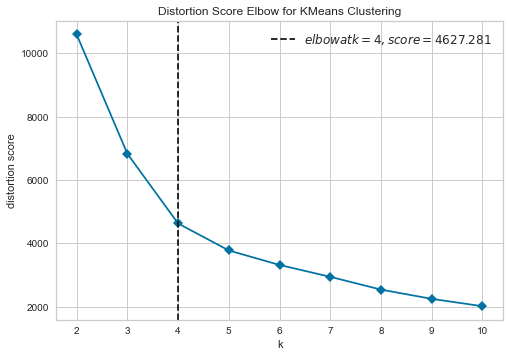

In [12]:
plot_model(kmeans, plot = 'elbow')

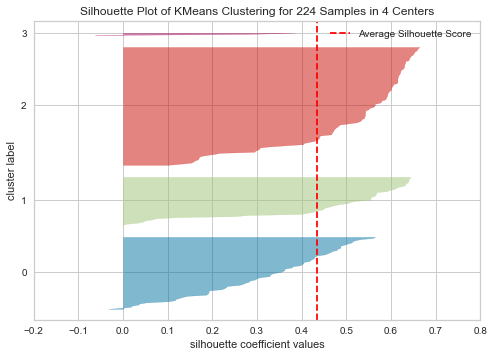

In [13]:
plot_model(kmeans, plot = 'silhouette')

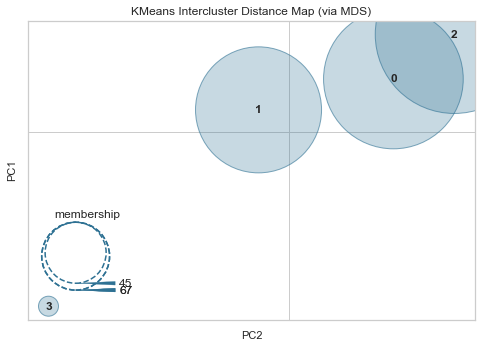

In [14]:
plot_model(kmeans, plot = 'distance')

In [15]:
plot_model(kmeans, plot = 'distribution')

# 6. Predict Model

In [16]:
pred_new = predict_model(kmeans, data=data)
pred_new.head()

Country Name      1995      1996      1997      1998  \
0                      Arab World  2.004868  2.014602  2.071309  2.177712   
1          Caribbean small states  2.801518  2.856684  2.997157  2.989451   
2  Central Europe and the Baltics  4.678528  4.753209  4.604574  4.499988   
3      Early-demographic dividend  2.203164  2.156632  2.227311  2.364100   
4             East Asia & Pacific  4.429090  4.203152  4.244351  4.453984   

       1999      2000      2001      2002      2003  ...      2006      2007  \
0  2.331000  2.333596  2.588751  2.540238  2.450415  ...  2.133038  2.166872   
1  2.767858  2.826752  2.679969  2.888693  2.740593  ...  2.650900  2.790665   
2  4.679082  4.539711  4.666272  4.900196  5.100249  ...  4.841450  4.809057   
3  2.454394  2.450555  2.527081  2.347702  2.363263  ...  2.369884  2.385251   
4  4.626920  4.688849  4.684790  4.613537  4.635098  ...  4.367146  4.297394   

       2008      2009      2010      2011      2012      2013      2014  \
0  2.101233  2.830067  2.489631  2.539570  2.711262  2.895427  3.073161   
1  2.822913  3.408651  3.264064  3.087653  3.314303  3.318432  3.260012   
2  5.054785  5.394921  5.284380  5.096212  5.041317  5.029266  5.017717   
3  2.405126  2.701260  2.507131  2.495491  2.497340  2.586701  2.665603   
4  4.434848  4.865241  4.775817  4.871727  4.866869  4.643221  4.571448   

     Cluster  
0  Cluster 2  
1  Cluster 2  
2  Cluster 0  
3  Cluster 2  
4  Cluster 0  

[5 rows x 22 columns]

# 7. Save / Load Model

In [17]:
save_model(kmeans, model_name='kmeans')

Transformation Pipeline and Model Succesfully Saved


In [18]:
loaded_kmeans = load_model('kmeans')
print(loaded_kmeans)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
     

In [19]:
from sklearn import set_config
set_config(display='diagram')
loaded_kmeans[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
                ('group', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('binn', Empty()),
                ('fix_perfect', Empty()), ('rem_outliers', Empty()),
                ('dummy', Dummify(target='dummy_target')),
                ('clean_names', Clean_Colum_Names()), ('fix_multi', Empty()),
                ('pca', Empty())],
         verbose=False)

In [20]:
from sklearn import set_config
set_config(display='text')

# 8. Deploy Model

In [21]:
deploy_model(kmeans, model_name = 'kmeans-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 9. Get Config / Set Config

In [22]:
X = get_config('X')
X.head()

1995      1996      1997      1998      1999      2000      2001  \
0  2.004868  2.014602  2.071309  2.177712  2.331000  2.333596  2.588751   
1  2.801518  2.856684  2.997157  2.989451  2.767858  2.826752  2.679969   
2  4.678528  4.753209  4.604574  4.499988  4.679082  4.539711  4.666272   
3  2.203164  2.156632  2.227311  2.364100  2.454394  2.450555  2.527081   
4  4.429090  4.203152  4.244351  4.453984  4.626920  4.688849  4.684790   

       2002      2003      2004      2005      2006      2007      2008  \
0  2.540238  2.450415  2.314914  2.134281  2.133038  2.166872  2.101233   
1  2.888693  2.740593  2.845971  2.629580  2.650900  2.790665  2.822913   
2  4.900196  5.100249  4.913629  4.970861  4.841450  4.809057  5.054785   
3  2.347702  2.363263  2.346824  2.337347  2.369884  2.385251  2.405126   
4  4.613537  4.635098  4.626696  4.566215  4.367146  4.297394  4.434848   

       2009      2010      2011      2012      2013      2014  
0  2.830067  2.489631  2.539570  2.711262  2.895427  3.073161  
1  3.408651  3.264064  3.087653  3.314303  3.318432  3.260012  
2  5.394921  5.284380  5.096212  5.041317  5.029266  5.017717  
3  2.701260  2.507131  2.495491  2.497340  2.586701  2.665603  
4  4.865241  4.775817  4.871727  4.866869  4.643221  4.571448

In [23]:
get_config('seed')

123

In [24]:
from pycaret.clustering import set_config
set_config('seed', 999)

In [25]:
get_config('seed')

999

# 10. Get System Logs

In [26]:
get_system_logs()

['2020-07-28 21', '03', '39,795', 'INFO', 'PyCaret Classification Module']
['2020-07-28 21', '03', '39,795', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-28 21', '03', '39,796', 'INFO', 'Initializing setup()']
['2020-07-28 21', '03', '39,796', 'INFO', 'USI', '86aa']
['2020-07-28 21', '03', '39,796', 'INFO', 'setup(data=(1070, 19), target=Purchase, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,']
['high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove

['2020-07-28 21', '06', '02,063', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '06', '02,073', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '06', '02,074', 'INFO', 'Initializing Fold 3']
['2020-07-28 21', '06', '02,075', 'INFO', 'Fitting Model']
['2020-07-28 21', '06', '02,083', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '06', '02,089', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '06', '02,090', 'INFO', 'Initializing Fold 4']
['2020-07-28 21', '06', '02,091', 'INFO', 'Fitting Model']
['2020-07-28 21', '06', '02,099', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '06', '02,106', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '06', '02,108', 'INFO', 'Initializing Fold 5']
['2020-07-28 21', '06', '02,109', 'INFO', 'Fitting Model']
['2020-07-28 21', '06', '02,117', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '06', '02,124', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '06', '02,125', 'INFO', 'Initializing Fold 6']
['2020-07-28 21', '06', '02,126', 'INFO', 'Fitting Mode

['2020-07-28 21', '10', '12,026', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '12,032', 'INFO', 'Initializing Fold 3']
['2020-07-28 21', '10', '12,042', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '12,330', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '12,340', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '12,344', 'INFO', 'Initializing Fold 4']
['2020-07-28 21', '10', '12,353', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '12,629', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '12,640', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '12,644', 'INFO', 'Initializing Fold 5']
['2020-07-28 21', '10', '12,652', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '12,933', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '12,943', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '12,947', 'INFO', 'Initializing Fold 6']
['2020-07-28 21', '10', '12,954', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '13,233', 'INFO', 'Evaluating Metric

['2020-07-28 21', '15', '12,395', 'WARNING', 'model has no predict_proba attribute. AUC to 0.00']
['2020-07-28 21', '15', '12,399', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '15', '12,409', 'INFO', 'Initializing Fold 5']
['2020-07-28 21', '15', '12,419', 'INFO', 'Fitting Model']
['2020-07-28 21', '15', '12,471', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '15', '12,471', 'WARNING', 'model has no predict_proba attribute. pred_prob set to 0.00']
['2020-07-28 21', '15', '12,476', 'WARNING', 'model has no predict_proba attribute. AUC to 0.00']
['2020-07-28 21', '15', '12,480', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '15', '12,492', 'INFO', 'Initializing Fold 6']
['2020-07-28 21', '15', '12,502', 'INFO', 'Fitting Model']
['2020-07-28 21', '15', '12,552', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '15', '12,552', 'WARNING', 'model has no predict_proba attribute. pred_prob set to 0.00']
['2020-07-28 21', '15', '12,557', 'WARNING', 'model has no predict_proba attribute. AU

['2020-07-28 23', '39', '01,395', 'INFO', 'machine', 'AMD64']
['2020-07-28 23', '39', '01,396', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-28 23', '39', '01,429', 'INFO', 'Memory', 'svmem(total=17032478720, available=10004021248, percent=41.3, used=7028457472, free=10004021248)']
['2020-07-28 23', '39', '01,429', 'INFO', 'Physical Core', '4']
['2020-07-28 23', '39', '01,429', 'INFO', 'Logical Core', '8']
['2020-07-28 23', '39', '01,429', 'INFO', 'Checking libraries']
['2020-07-28 23', '39', '01,429', 'INFO', 'pd==1.0.4']
['2020-07-28 23', '39', '01,429', 'INFO', 'numpy==1.18.5']
['2020-07-28 23', '39', '01,604', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-28 23', '39', '01,687', 'INFO', 'mlflow==1.8.0']
['2020-07-28 23', '39', '01,687', 'INFO', 'Checking Exceptions']
['2020-07-28 23', '39', '01,712', 'INFO', 'wordcloud==1.7.0']
['2020-07-28 23', '39', '01,948', 'INFO', 'nltk==3.5']
['2020-07-28 23', '39', '02,011', 'INFO', 'textblob==0.15.3']
['2020-07-28 23', '39', '02,379', 

['2020-07-28 23', '50', '19,250', 'INFO', 'Extracting Trigrams']
['2020-07-28 23', '50', '21,928', 'INFO', 'Extracting Trigrams']
['2020-07-28 23', '50', '23,085', 'INFO', 'Extracting Trigrams']
['2020-07-28 23', '50', '34,772', 'INFO', 'Lemmatizing tokens']
['2020-07-28 23', '50', '39,794', 'INFO', 'Lemmatizing tokens']
['2020-07-28 23', '50', '41,762', 'INFO', 'Lemmatizing tokens']
['2020-07-28 23', '50', '42,670', 'INFO', 'Lemmatizing tokens']
['2020-07-28 23', '51', '44,163', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-28 23', '51', '46,004', 'INFO', 'Creating corpus and dictionary']
['2020-07-28 23', '51', '48,022', 'INFO', 'Compiling processed text']
['2020-07-28 23', '51', '48,048', 'INFO', 'Compiling information grid']
['2020-07-28 23', '51', '48,550', 'INFO', 'Creating MLFlow logs']
['2020-07-28 23', '51', '49,232', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-28 23', '51', '49,244', 'INFO', 'setup() succesfully completed.............................

['2020-07-29 00', '00', '43,850', 'INFO', 'session_id set to', '6698']
['2020-07-29 00', '00', '43,850', 'INFO', 'Copying training dataset']
['2020-07-29 00', '00', '43,851', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 00', '00', '44,125', 'INFO', 'No custom stopwords defined']
['2020-07-29 00', '00', '44,125', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 00', '00', '44,128', 'INFO', 'No custom stopwords defined']
['2020-07-29 00', '00', '44,128', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 00', '00', '44,430', 'INFO', 'Removing special characters from the text']
['2020-07-29 00', '00', '44,516', 'INFO', 'Removing special characters from the text']
['2020-07-29 00', '00', '44,768', 'INFO', 'Compiling processed text']
['2020-07-29 00', '00', '44,794', 'INFO', 'Compiling information grid']
['2020-07-29 00', '00', '44,832', 'INFO', 'gensim==3.8.3']
['2020-07-29 00', '00', '45,310', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '00',

['2020-07-29 00', '14', '09,886', 'INFO', 'Extracting Trigrams']
['2020-07-29 00', '14', '12,005', 'INFO', 'Removing stopwords']
['2020-07-29 00', '14', '14,803', 'INFO', 'Extracting Trigrams']
['2020-07-29 00', '14', '15,675', 'INFO', 'Extracting Bigrams']
['2020-07-29 00', '14', '25,775', 'INFO', 'Extracting Trigrams']
['2020-07-29 00', '14', '28,544', 'INFO', 'Lemmatizing tokens']
['2020-07-29 00', '14', '29,903', 'INFO', 'Lemmatizing tokens']
['2020-07-29 00', '14', '34,793', 'INFO', 'Lemmatizing tokens']
['2020-07-29 00', '14', '44,329', 'INFO', 'Lemmatizing tokens']
['2020-07-29 00', '15', '37,067', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 00', '15', '39,288', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 00', '15', '41,411', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 00', '15', '41,488', 'INFO', 'Compiling processed text']
['2020-07-29 00', '15', '41,512', 'INFO', 'Compiling information grid']
['2020-07-29 00', '15', '42,064', 'INFO

['2020-07-29 00', '26', '41,003', 'INFO', 'numpy==1.18.5']
['2020-07-29 00', '26', '41,171', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '26', '41,622', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 00', '26', '41,623', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '26', '41,623', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 00', '26', '41,623', 'INFO', 'Checking exceptions']
['2020-07-29 00', '26', '41,623', 'INFO', 'Preloading libraries']
['2020-07-29 00', '26', '41,623', 'INFO', 'Preparing display monitor']
['2020-07-29 00', '26', '41,634', 'INFO', 'Defining topic model']
['2020-07-29 00', '26', '41,634', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 00', '26', '41,634', 'INFO', 'Defining num_topics parameter']
['2020-07-29 00', '26', '41,634', 'INFO', 'num_topics set to', '4']
['2020-07-29 00', '26', '41,635', 'INFO', 'LDA multi_core enabled'

['2020-07-29 00', '38', '38,080', 'INFO', 'Lemmatizing tokens']
['2020-07-29 00', '39', '36,192', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 00', '39', '38,000', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 00', '39', '39,932', 'INFO', 'Compiling processed text']
['2020-07-29 00', '39', '39,959', 'INFO', 'Compiling information grid']
['2020-07-29 00', '39', '40,306', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 00', '39', '40,481', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '39', '40,954', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 00', '39', '40,954', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '39', '40,954', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 00', '39', '40,954', 'INFO', 'Checking exceptions']
['2020-07-29 00', '39', '40,954', 'INFO', 'Preloading libraries']
['2020-07-29 00', '39', '40,954', 'INFO',

['2020-07-29 00', '46', '32,944', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 00', '46', '33,652', 'INFO', 'mlflow==1.8.0']
['2020-07-29 00', '46', '33,653', 'INFO', 'Checking Exceptions']
['2020-07-29 00', '46', '34,853', 'INFO', 'Preloading libraries']
['2020-07-29 00', '46', '35,043', 'INFO', 'Preparing display monitor']
['2020-07-29 00', '46', '35,056', 'INFO', 'Importing libraries']
['2020-07-29 00', '46', '35,056', 'INFO', 'Declaring global variables']
['2020-07-29 00', '46', '35,056', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 00', '46', '35,056', 'INFO', 'session_id set to', '5461']
['2020-07-29 00', '46', '35,056', 'INFO', 'Copying training dataset']
['2020-07-29 00', '46', '35,057', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 00', '46', '35,196', 'INFO', 'Tokenizing Words']
['2020-07-29 00', '46', '35,437', 'INFO', 'No custom stopwords defined']
['2020-07-29 00', '46', '35,438', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 00', '46', '35,7

['2020-07-29 00', '59', '35,355', 'INFO', 'Compiling information grid']
['2020-07-29 00', '59', '35,471', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '59', '35,876', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '59', '35,931', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 00', '59', '35,942', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 00', '59', '35,942', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '59', '35,942', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 00', '59', '35,942', 'INFO', 'Checking exceptions']
['2020-07-29 00', '59', '35,942', 'INFO', 'Preloading libraries']
['2020-07-29 00', '59', '35,942', 'INFO', 'Preparing display monitor']
['2020-07-29 00', '59', '35,951', 'INFO', 'Defining topic model']
['2020-07-29 00', '59', '35,951', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 00', '59', '35,951', 'INFO', 'Defin

['2020-07-29 01', '08', '14,309', 'INFO', 'PyCaret NLP Module']
['2020-07-29 01', '08', '14,309', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 01', '08', '14,309', 'INFO', 'Initializing setup()']
['2020-07-29 01', '08', '14,310', 'INFO', 'USI', '0eaf']
['2020-07-29 01', '08', '14,310', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 01', '08', '14,310', 'INFO', 'Checking environment']
['2020-07-29 01', '08', '14,310', 'INFO', 'python_version', '3.6.10']
['2020-07-29 01', '08', '14,310', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 01', '08', '14,310', 'INFO', 'machine', 'AMD64']
['2020-07-29 01', '08', '14,311', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 01', '08', '14,350', 'INFO', 'Memory', 'svmem(total=17032478720, available=8919162880, percent=47.6, used=81133158

['2020-07-29 01', '19', '14,044', 'INFO', 'Compiling processed text']
['2020-07-29 01', '19', '14,071', 'INFO', 'Compiling information grid']
['2020-07-29 01', '19', '14,718', 'INFO', 'Creating MLFlow logs']
['2020-07-29 01', '19', '15,262', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 01', '19', '15,262', 'INFO', 'Initializing create_model()']
['2020-07-29 01', '19', '15,263', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 01', '19', '15,263', 'INFO', 'Checking exceptions']
['2020-07-29 01', '19', '15,263', 'INFO', 'Preloading libraries']
['2020-07-29 01', '19', '15,263', 'INFO', 'Preparing display monitor']
['2020-07-29 01', '19', '15,273', 'INFO', 'Defining topic model']
['2020-07-29 01', '19', '15,273', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 01', '19', '15,274', 'INFO', 'Defining num_topics parameter']
['2020-07-29 01', '19', '15,274', 'INFO', 'num_topi

['2020-07-29 01', '27', '54,843', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 01', '27', '54,843', 'INFO', 'Checking exceptions']
['2020-07-29 01', '27', '54,844', 'INFO', 'Preloading libraries']
['2020-07-29 01', '27', '54,844', 'INFO', 'Preparing display monitor']
['2020-07-29 01', '27', '54,859', 'INFO', 'Defining topic model']
['2020-07-29 01', '27', '54,859', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 01', '27', '54,859', 'INFO', 'Defining num_topics parameter']
['2020-07-29 01', '27', '54,859', 'INFO', 'num_topics set to', '4']
['2020-07-29 01', '27', '54,860', 'INFO', 'LDA multi_core enabled']
['2020-07-29 01', '27', '54,860', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 01', '27', '55,215', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 01', '27', '55,345', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 01', '27', '56,054', 'INFO', 'mlflow==1.8.0']
['2020-07-29 01', '27', '56,055', 'INFO', 'Chec

['2020-07-29 01', '39', '52,844', 'INFO', 'Lemmatizing tokens']
['2020-07-29 01', '39', '58,749', 'INFO', 'Lemmatizing tokens']
['2020-07-29 01', '40', '01,932', 'INFO', 'Lemmatizing tokens']
['2020-07-29 01', '40', '51,184', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 01', '40', '53,367', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 01', '40', '55,177', 'INFO', 'Compiling processed text']
['2020-07-29 01', '40', '55,194', 'INFO', 'Compiling information grid']
['2020-07-29 01', '40', '55,714', 'INFO', 'Creating MLFlow logs']
['2020-07-29 01', '40', '56,488', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 01', '40', '56,488', 'INFO', 'Initializing create_model()']
['2020-07-29 01', '40', '56,488', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 01', '40', '56,488', 'INFO', 'Checking exceptions']
['2020-07-29 01', '40', '56,488', 'INFO', 'Preloading librari

['2020-07-29 01', '47', '57,750', 'INFO', 'gensim==3.8.3']
['2020-07-29 01', '47', '58,365', 'INFO', 'spacy==2.2.4']
['2020-07-29 01', '47', '58,466', 'INFO', 'gensim==3.8.3']
['2020-07-29 01', '47', '58,698', 'INFO', 'Tokenizing Words']
['2020-07-29 01', '47', '59,068', 'INFO', 'spacy==2.2.4']
['2020-07-29 01', '47', '59,110', 'INFO', 'nltk==3.5']
['2020-07-29 01', '47', '59,177', 'INFO', 'textblob==0.15.3']
['2020-07-29 01', '47', '59,797', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 01', '47', '59,835', 'INFO', 'nltk==3.5']
['2020-07-29 01', '47', '59,878', 'INFO', 'textblob==0.15.3']
['2020-07-29 01', '47', '59,925', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 01', '48', '00,510', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 01', '48', '00,607', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 01', '48', '00,634', 'INFO', 'mlflow==1.8.0']
['2020-07-29 01', '48', '00,634', 'INFO', 'Checking Exceptions']
['2020-07-29 01', '48', '01,426', 'INFO', 'mlflow==1.8.0']
['2020-07-29 01', '48', '01,427', 'INFO',

['2020-07-29 02', '01', '09,577', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 02', '01', '09,656', 'INFO', 'nltk==3.5']
['2020-07-29 02', '01', '09,724', 'INFO', 'textblob==0.15.3']
['2020-07-29 02', '01', '09,968', 'INFO', 'No custom stopwords defined']
['2020-07-29 02', '01', '09,968', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 02', '01', '10,298', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 02', '01', '10,307', 'INFO', 'Removing special characters from the text']
['2020-07-29 02', '01', '10,402', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 02', '01', '11,055', 'INFO', 'mlflow==1.8.0']
['2020-07-29 02', '01', '11,056', 'INFO', 'Checking Exceptions']
['2020-07-29 02', '01', '11,435', 'INFO', 'Extracting Bigrams']
['2020-07-29 02', '01', '12,327', 'INFO', 'Preloading libraries']
['2020-07-29 02', '01', '12,541', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '01', '12,549', 'INFO', 'Importing libraries']
['2020-07-29 02', '01', '12,549', 'INFO', 'Decla

['2020-07-29 02', '09', '47,776', 'INFO', 'Preloading libraries']
['2020-07-29 02', '09', '47,992', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '09', '48,011', 'INFO', 'Importing libraries']
['2020-07-29 02', '09', '48,011', 'INFO', 'Declaring global variables']
['2020-07-29 02', '09', '48,011', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 02', '09', '48,012', 'INFO', 'session_id set to', '5783']
['2020-07-29 02', '09', '48,012', 'INFO', 'Copying training dataset']
['2020-07-29 02', '09', '48,012', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 02', '09', '48,386', 'INFO', 'No custom stopwords defined']
['2020-07-29 02', '09', '48,387', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 02', '09', '48,734', 'INFO', 'Removing special characters from the text']
['2020-07-29 02', '09', '50,025', 'INFO', 'PyCaret NLP Module']
['2020-07-29 02', '09', '50,025', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 02', '09', '50,025', 'INFO', 'Initializ

['2020-07-29 02', '20', '45,668', 'INFO', 'No custom stopwords defined']
['2020-07-29 02', '20', '45,669', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 02', '20', '45,853', 'INFO', 'mlflow==1.8.0']
['2020-07-29 02', '20', '45,853', 'INFO', 'Checking Exceptions']
['2020-07-29 02', '20', '46,015', 'INFO', 'Removing special characters from the text']
['2020-07-29 02', '20', '46,611', 'INFO', 'Preloading libraries']
['2020-07-29 02', '20', '46,817', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '20', '46,834', 'INFO', 'Importing libraries']
['2020-07-29 02', '20', '46,835', 'INFO', 'Declaring global variables']
['2020-07-29 02', '20', '46,835', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 02', '20', '46,835', 'INFO', 'session_id set to', '4566']
['2020-07-29 02', '20', '46,835', 'INFO', 'Copying training dataset']
['2020-07-29 02', '20', '46,836', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 02', '20', '47,160', 'INFO', 'No custom stopwords def

['2020-07-29 02', '29', '22,862', 'INFO', 'Initializing setup()']
['2020-07-29 02', '29', '22,862', 'INFO', 'USI', '45a5']
['2020-07-29 02', '29', '22,862', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 02', '29', '22,862', 'INFO', 'Checking environment']
['2020-07-29 02', '29', '22,862', 'INFO', 'python_version', '3.6.10']
['2020-07-29 02', '29', '22,862', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 02', '29', '22,862', 'INFO', 'machine', 'AMD64']
['2020-07-29 02', '29', '22,863', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 02', '29', '22,895', 'INFO', 'Memory', 'svmem(total=17032478720, available=9822638080, percent=42.3, used=7209840640, free=9822638080)']
['2020-07-29 02', '29', '22,896', 'INFO', 'Physical Core', '4']
['2020-07-29 02', '29', '22,896', 'INFO', 'Logical 

['2020-07-29 02', '40', '23,720', 'INFO', 'Checking Exceptions']
['2020-07-29 02', '40', '24,487', 'INFO', 'PyCaret NLP Module']
['2020-07-29 02', '40', '24,487', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 02', '40', '24,487', 'INFO', 'Initializing setup()']
['2020-07-29 02', '40', '24,487', 'INFO', 'USI', '7b20']
['2020-07-29 02', '40', '24,487', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 02', '40', '24,487', 'INFO', 'Checking environment']
['2020-07-29 02', '40', '24,487', 'INFO', 'python_version', '3.6.10']
['2020-07-29 02', '40', '24,488', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 02', '40', '24,488', 'INFO', 'machine', 'AMD64']
['2020-07-29 02', '40', '24,488', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 02', '40', '24,529', 'INFO', 'Memory', 'svmem(tot

['2020-07-29 02', '49', '09,769', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '49', '09,779', 'INFO', 'Defining topic model']
['2020-07-29 02', '49', '09,779', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 02', '49', '09,779', 'INFO', 'Defining num_topics parameter']
['2020-07-29 02', '49', '09,780', 'INFO', 'num_topics set to', '4']
['2020-07-29 02', '49', '09,780', 'INFO', 'LDA multi_core enabled']
['2020-07-29 02', '49', '09,781', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 02', '49', '09,993', 'INFO', 'Extracting Bigrams']
['2020-07-29 02', '49', '10,084', 'INFO', 'mlflow==1.8.0']
['2020-07-29 02', '49', '10,084', 'INFO', 'Checking Exceptions']
['2020-07-29 02', '49', '11,450', 'INFO', 'Preloading libraries']
['2020-07-29 02', '49', '11,649', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '49', '11,663', 'INFO', 'Importing libraries']
['2020-07-29 02', '49', '11,664', 'INFO', 'Declaring global variables']
['2020-07-29 02', '49', '11,

['2020-07-29 03', '00', '14,967', 'INFO', 'Extracting Bigrams']
['2020-07-29 03', '00', '17,432', 'INFO', 'Tokenizing Words']
['2020-07-29 03', '00', '18,569', 'INFO', 'Extracting Trigrams']
['2020-07-29 03', '00', '23,532', 'INFO', 'Extracting Trigrams']
['2020-07-29 03', '00', '24,416', 'INFO', 'Removing stopwords']
['2020-07-29 03', '00', '26,211', 'INFO', 'Extracting Trigrams']
['2020-07-29 03', '00', '27,916', 'INFO', 'Extracting Bigrams']
['2020-07-29 03', '00', '37,700', 'INFO', 'Lemmatizing tokens']
['2020-07-29 03', '00', '38,663', 'INFO', 'Extracting Trigrams']
['2020-07-29 03', '00', '44,090', 'INFO', 'Lemmatizing tokens']
['2020-07-29 03', '00', '45,540', 'INFO', 'Lemmatizing tokens']
['2020-07-29 03', '00', '58,291', 'INFO', 'Lemmatizing tokens']
['2020-07-29 03', '01', '46,735', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 03', '01', '48,610', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 03', '01', '50,673', 'INFO', 'Compiling processed text']
['

['2020-07-29 03', '10', '57,924', 'INFO', 'Defining topic model']
['2020-07-29 03', '10', '57,924', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 03', '10', '57,924', 'INFO', 'Defining num_topics parameter']
['2020-07-29 03', '10', '57,924', 'INFO', 'num_topics set to', '4']
['2020-07-29 03', '10', '57,925', 'INFO', 'LDA multi_core enabled']
['2020-07-29 03', '10', '57,925', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 03', '10', '58,223', 'INFO', 'Removing special characters from the text']
['2020-07-29 03', '10', '58,909', 'INFO', 'Extracting Bigrams']
['2020-07-29 03', '11', '00,929', 'INFO', 'Tokenizing Words']
['2020-07-29 03', '11', '01,545', 'INFO', 'Extracting Bigrams']
['2020-07-29 03', '11', '02,665', 'INFO', 'PyCaret NLP Module']
['2020-07-29 03', '11', '02,665', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 03', '11', '02,665', 'INFO', 'Initializing setup()']
['2020-07-29 03', '11', '02,665', 'INFO', 'USI', 'e906']
['2020-07-29 03', '11',

['2020-07-29 03', '21', '45,025', 'INFO', 'Tokenizing Words']
['2020-07-29 03', '21', '45,695', 'INFO', 'Tokenizing Words']
['2020-07-29 03', '21', '45,706', 'INFO', 'gensim==3.8.3']
['2020-07-29 03', '21', '46,326', 'INFO', 'spacy==2.2.4']
['2020-07-29 03', '21', '47,101', 'INFO', 'nltk==3.5']
['2020-07-29 03', '21', '47,166', 'INFO', 'textblob==0.15.3']
['2020-07-29 03', '21', '47,797', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 03', '21', '47,917', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 03', '21', '48,583', 'INFO', 'mlflow==1.8.0']
['2020-07-29 03', '21', '48,584', 'INFO', 'Checking Exceptions']
['2020-07-29 03', '21', '49,891', 'INFO', 'Preloading libraries']
['2020-07-29 03', '21', '50,096', 'INFO', 'Preparing display monitor']
['2020-07-29 03', '21', '50,108', 'INFO', 'Importing libraries']
['2020-07-29 03', '21', '50,108', 'INFO', 'Declaring global variables']
['2020-07-29 03', '21', '50,109', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 03', '21', '50,109', 'INFO', 'sessi

['2020-07-29 03', '30', '24,741', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 03', '30', '24,783', 'INFO', 'Memory', 'svmem(total=17032478720, available=9443528704, percent=44.6, used=7588950016, free=9443528704)']
['2020-07-29 03', '30', '24,783', 'INFO', 'Physical Core', '4']
['2020-07-29 03', '30', '24,783', 'INFO', 'Logical Core', '8']
['2020-07-29 03', '30', '24,783', 'INFO', 'Checking libraries']
['2020-07-29 03', '30', '24,783', 'INFO', 'pd==1.0.4']
['2020-07-29 03', '30', '24,784', 'INFO', 'numpy==1.18.5']
['2020-07-29 03', '30', '24,875', 'INFO', 'Preloading libraries']
['2020-07-29 03', '30', '25,093', 'INFO', 'Preparing display monitor']
['2020-07-29 03', '30', '25,099', 'INFO', 'spacy==2.2.4']
['2020-07-29 03', '30', '25,103', 'INFO', 'Importing libraries']
['2020-07-29 03', '30', '25,104', 'INFO', 'Declaring global variables']
['2020-07-29 03', '30', '25,104', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 03', '30', '25,104', 'INFO', 'session_id set

['2020-07-29 03', '43', '19,113', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 03', '43', '19,114', 'INFO', 'Initializing create_model()']
['2020-07-29 03', '43', '19,114', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 03', '43', '19,114', 'INFO', 'Checking exceptions']
['2020-07-29 03', '43', '19,114', 'INFO', 'Preloading libraries']
['2020-07-29 03', '43', '19,114', 'INFO', 'Preparing display monitor']
['2020-07-29 03', '43', '19,124', 'INFO', 'Defining topic model']
['2020-07-29 03', '43', '19,124', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 03', '43', '19,124', 'INFO', 'Defining num_topics parameter']
['2020-07-29 03', '43', '19,124', 'INFO', 'num_topics set to', '4']
['2020-07-29 03', '43', '19,125', 'INFO', 'LDA multi_core enabled']
['2020-07-29 03', '43', '19,125', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 03', '43', '19,851', 'INFO', '

['2020-07-29 03', '52', '37,081', 'INFO', 'python_version', '3.6.10']
['2020-07-29 03', '52', '37,081', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 03', '52', '37,081', 'INFO', 'machine', 'AMD64']
['2020-07-29 03', '52', '37,082', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 03', '52', '37,121', 'INFO', 'Memory', 'svmem(total=17032478720, available=9237000192, percent=45.8, used=7795478528, free=9237000192)']
['2020-07-29 03', '52', '37,121', 'INFO', 'Physical Core', '4']
['2020-07-29 03', '52', '37,121', 'INFO', 'Logical Core', '8']
['2020-07-29 03', '52', '37,121', 'INFO', 'Checking libraries']
['2020-07-29 03', '52', '37,122', 'INFO', 'pd==1.0.4']
['2020-07-29 03', '52', '37,122', 'INFO', 'numpy==1.18.5']
['2020-07-29 03', '52', '37,398', 'INFO', 'Extracting Bigrams']
['2020-07-29 03', '52', '37,600', 'INFO', 'Extracting Bigrams']
['2020-07-29 03', '52', '38,440', 'INFO', 'Extracting Bigrams']
['2020-07-29 03', '52', '38,516', '

['2020-07-29 04', '05', '19,208', 'INFO', 'Compiling information grid']
['2020-07-29 04', '05', '19,775', 'INFO', 'Creating MLFlow logs']
['2020-07-29 04', '05', '20,324', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 04', '05', '20,324', 'INFO', 'Initializing create_model()']
['2020-07-29 04', '05', '20,324', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 04', '05', '20,324', 'INFO', 'Checking exceptions']
['2020-07-29 04', '05', '20,324', 'INFO', 'Preloading libraries']
['2020-07-29 04', '05', '20,324', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '05', '20,337', 'INFO', 'Defining topic model']
['2020-07-29 04', '05', '20,337', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 04', '05', '20,338', 'INFO', 'Defining num_topics parameter']
['2020-07-29 04', '05', '20,338', 'INFO', 'num_topics set to', '4']
['2020-07-29 04', '05', '20,338', 'INFO', 'LDA multi_

['2020-07-29 04', '14', '03,458', 'INFO', 'Preloading libraries']
['2020-07-29 04', '14', '03,458', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '14', '03,468', 'INFO', 'Defining topic model']
['2020-07-29 04', '14', '03,468', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 04', '14', '03,468', 'INFO', 'Defining num_topics parameter']
['2020-07-29 04', '14', '03,468', 'INFO', 'num_topics set to', '4']
['2020-07-29 04', '14', '03,469', 'INFO', 'LDA multi_core enabled']
['2020-07-29 04', '14', '03,469', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 04', '14', '03,679', 'INFO', 'spacy==2.2.4']
['2020-07-29 04', '14', '04,460', 'INFO', 'nltk==3.5']
['2020-07-29 04', '14', '04,473', 'INFO', 'PyCaret NLP Module']
['2020-07-29 04', '14', '04,474', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 04', '14', '04,474', 'INFO', 'Initializing setup()']
['2020-07-29 04', '14', '04,474', 'INFO', 'USI', 'b9f1']
['2020-07-29 04', '14', '04,474', 'INFO', 'setup(d

['2020-07-29 04', '27', '13,183', 'INFO', 'Compiling processed text']
['2020-07-29 04', '27', '13,191', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 04', '27', '13,203', 'INFO', 'Compiling information grid']
['2020-07-29 04', '27', '13,509', 'INFO', 'nltk==3.5']
['2020-07-29 04', '27', '13,572', 'INFO', 'textblob==0.15.3']
['2020-07-29 04', '27', '13,704', 'INFO', 'Creating MLFlow logs']
['2020-07-29 04', '27', '13,786', 'INFO', 'gensim==3.8.3']
['2020-07-29 04', '27', '14,205', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 04', '27', '14,254', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 04', '27', '14,254', 'INFO', 'Initializing create_model()']
['2020-07-29 04', '27', '14,254', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 04', '27', '14,254', 'INFO', 'Checking exceptions']
['2020-07-29 04', '27', '14,254', 'INFO', 'Preloading libraries']
['2020-07-29 04', '27', '1

['2020-07-29 04', '36', '01,322', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 04', '36', '01,322', 'INFO', 'machine', 'AMD64']
['2020-07-29 04', '36', '01,323', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 04', '36', '01,342', 'INFO', 'gensim==3.8.3']
['2020-07-29 04', '36', '01,364', 'INFO', 'Memory', 'svmem(total=17032478720, available=9825828864, percent=42.3, used=7206649856, free=9825828864)']
['2020-07-29 04', '36', '01,364', 'INFO', 'Physical Core', '4']
['2020-07-29 04', '36', '01,364', 'INFO', 'Logical Core', '8']
['2020-07-29 04', '36', '01,364', 'INFO', 'Checking libraries']
['2020-07-29 04', '36', '01,365', 'INFO', 'pd==1.0.4']
['2020-07-29 04', '36', '01,365', 'INFO', 'numpy==1.18.5']
['2020-07-29 04', '36', '01,624', 'INFO', 'PyCaret NLP Module']
['2020-07-29 04', '36', '01,624', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 04', '36', '01,624', 'INFO', 'Initializing setup()']
['2020-07-29 04', '36', '01,624', 

['2020-07-29 04', '49', '00,404', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 04', '49', '00,404', 'INFO', 'machine', 'AMD64']
['2020-07-29 04', '49', '00,405', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 04', '49', '00,448', 'INFO', 'Memory', 'svmem(total=17032478720, available=9977995264, percent=41.4, used=7054483456, free=9977995264)']
['2020-07-29 04', '49', '00,449', 'INFO', 'Physical Core', '4']
['2020-07-29 04', '49', '00,449', 'INFO', 'Logical Core', '8']
['2020-07-29 04', '49', '00,449', 'INFO', 'Checking libraries']
['2020-07-29 04', '49', '00,449', 'INFO', 'pd==1.0.4']
['2020-07-29 04', '49', '00,449', 'INFO', 'numpy==1.18.5']
['2020-07-29 04', '49', '01,804', 'INFO', 'gensim==3.8.3']
['2020-07-29 04', '49', '02,405', 'INFO', 'spacy==2.2.4']
['2020-07-29 04', '49', '03,196', 'INFO', 'nltk==3.5']
['2020-07-29 04', '49', '03,255', 'INFO', 'textblob==0.15.3']
['2020-07-29 04', '49', '03,783', 'INFO', 'pyLDAvis==2.1.2']
['

['2020-07-29 04', '57', '40,510', 'INFO', 'Checking exceptions']
['2020-07-29 04', '57', '40,510', 'INFO', 'Preloading libraries']
['2020-07-29 04', '57', '40,510', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '57', '40,511', 'INFO', 'Memory', 'svmem(total=17032478720, available=9435566080, percent=44.6, used=7596912640, free=9435566080)']
['2020-07-29 04', '57', '40,511', 'INFO', 'Physical Core', '4']
['2020-07-29 04', '57', '40,511', 'INFO', 'Logical Core', '8']
['2020-07-29 04', '57', '40,511', 'INFO', 'Checking libraries']
['2020-07-29 04', '57', '40,511', 'INFO', 'pd==1.0.4']
['2020-07-29 04', '57', '40,511', 'INFO', 'numpy==1.18.5']
['2020-07-29 04', '57', '40,522', 'INFO', 'Defining topic model']
['2020-07-29 04', '57', '40,522', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 04', '57', '40,522', 'INFO', 'Defining num_topics parameter']
['2020-07-29 04', '57', '40,523', 'INFO', 'num_topics set to', '4']
['2020-07-29 04', '57', '40,523', 'INFO', 'LDA multi

['2020-07-29 05', '08', '53,293', 'INFO', 'Copying training dataset']
['2020-07-29 05', '08', '53,294', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '08', '53,564', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '08', '53,564', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 05', '08', '53,874', 'INFO', 'Removing special characters from the text']
['2020-07-29 05', '08', '54,323', 'INFO', 'Removing stopwords']
['2020-07-29 05', '08', '56,970', 'INFO', 'Tokenizing Words']
['2020-07-29 05', '08', '57,069', 'INFO', 'Extracting Trigrams']
['2020-07-29 05', '08', '58,151', 'INFO', 'Extracting Bigrams']
['2020-07-29 05', '09', '01,518', 'INFO', 'Extracting Trigrams']
['2020-07-29 05', '09', '03,148', 'INFO', 'Removing stopwords']
['2020-07-29 05', '09', '07,281', 'INFO', 'Extracting Bigrams']
['2020-07-29 05', '09', '08,270', 'INFO', 'Extracting Trigrams']
['2020-07-29 05', '09', '17,074', 'INFO', 'Lemmatizing tokens']
['2020-07-29 05', '09', '18,154

['2020-07-29 05', '21', '39,962', 'INFO', 'Preloading libraries']
['2020-07-29 05', '21', '39,962', 'INFO', 'Preparing display monitor']
['2020-07-29 05', '21', '39,974', 'INFO', 'Defining topic model']
['2020-07-29 05', '21', '39,974', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 05', '21', '39,974', 'INFO', 'Defining num_topics parameter']
['2020-07-29 05', '21', '39,974', 'INFO', 'num_topics set to', '4']
['2020-07-29 05', '21', '39,975', 'INFO', 'LDA multi_core enabled']
['2020-07-29 05', '21', '39,975', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 05', '21', '41,597', 'INFO', 'Tokenizing Words']
['2020-07-29 05', '21', '42,216', 'INFO', 'Tokenizing Words']
['2020-07-29 05', '21', '42,982', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 05', '21', '44,578', 'INFO', 'PyCaret NLP Module']
['2020-07-29 05', '21', '44,578', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 05', '21', '44,578', 'INFO', 'Initializing setup()']
['2020-07-29 0

['2020-07-29 05', '32', '53,907', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '32', '54,279', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '32', '54,279', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 05', '32', '54,562', 'INFO', 'Removing special characters from the text']
['2020-07-29 05', '32', '54,652', 'INFO', 'Extracting Bigrams']
['2020-07-29 05', '32', '56,756', 'INFO', 'Extracting Bigrams']
['2020-07-29 05', '32', '57,140', 'INFO', 'Tokenizing Words']
['2020-07-29 05', '33', '00,218', 'INFO', 'Removing stopwords']
['2020-07-29 05', '33', '03,343', 'INFO', 'Removing stopwords']
['2020-07-29 05', '33', '04,076', 'INFO', 'Extracting Bigrams']
['2020-07-29 05', '33', '05,184', 'INFO', 'Extracting Trigrams']
['2020-07-29 05', '33', '07,218', 'INFO', 'Extracting Trigrams']
['2020-07-29 05', '33', '07,362', 'INFO', 'Extracting Bigrams']
['2020-07-29 05', '33', '14,938', 'INFO', 'Extracting Trigrams']
['2020-07-29 05', '33', '18,312', 'IN

['2020-07-29 05', '41', '29,418', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 05', '41', '29,782', 'INFO', 'Preloading libraries']
['2020-07-29 05', '41', '29,867', 'INFO', 'Compiling processed text']
['2020-07-29 05', '41', '29,895', 'INFO', 'Compiling information grid']
['2020-07-29 05', '41', '30,007', 'INFO', 'Preparing display monitor']
['2020-07-29 05', '41', '30,017', 'INFO', 'Importing libraries']
['2020-07-29 05', '41', '30,018', 'INFO', 'Declaring global variables']
['2020-07-29 05', '41', '30,018', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 05', '41', '30,018', 'INFO', 'session_id set to', '3953']
['2020-07-29 05', '41', '30,019', 'INFO', 'Copying training dataset']
['2020-07-29 05', '41', '30,020', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '41', '30,368', 'INFO', 'Creating MLFlow logs']
['2020-07-29 05', '41', '30,390', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '41', '30,390', 'INFO', 'Removing numeric characters from 

['2020-07-29 05', '54', '29,993', 'INFO', 'Defining num_topics parameter']
['2020-07-29 05', '54', '29,993', 'INFO', 'num_topics set to', '4']
['2020-07-29 05', '54', '29,994', 'INFO', 'LDA multi_core enabled']
['2020-07-29 05', '54', '29,994', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 05', '54', '31,254', 'INFO', 'gensim==3.8.3']
['2020-07-29 05', '54', '31,936', 'INFO', 'spacy==2.2.4']
['2020-07-29 05', '54', '32,750', 'INFO', 'nltk==3.5']
['2020-07-29 05', '54', '32,812', 'INFO', 'textblob==0.15.3']
['2020-07-29 05', '54', '33,438', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 05', '54', '33,502', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 05', '54', '33,563', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 05', '54', '34,222', 'INFO', 'mlflow==1.8.0']
['2020-07-29 05', '54', '34,223', 'INFO', 'Checking Exceptions']
['2020-07-29 05', '54', '34,794', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 05', '54', '34,920', 'INFO', 'PyCaret NLP Module']


['2020-07-29 06', '03', '33,870', 'INFO', 'Declaring global variables']
['2020-07-29 06', '03', '33,871', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 06', '03', '33,871', 'INFO', 'session_id set to', '3877']
['2020-07-29 06', '03', '33,871', 'INFO', 'Copying training dataset']
['2020-07-29 06', '03', '33,871', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 06', '03', '34,220', 'INFO', 'No custom stopwords defined']
['2020-07-29 06', '03', '34,220', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 06', '03', '34,370', 'INFO', 'Removing stopwords']
['2020-07-29 06', '03', '34,516', 'INFO', 'Removing special characters from the text']
['2020-07-29 06', '03', '34,665', 'INFO', 'Tokenizing Words']
['2020-07-29 06', '03', '37,366', 'INFO', 'Tokenizing Words']
['2020-07-29 06', '03', '38,041', 'INFO', 'Extracting Bigrams']
['2020-07-29 06', '03', '40,825', 'INFO', 'Removing stopwords']
['2020-07-29 06', '03', '42,234', 'INFO', 'Extracting Trigrams']
['2020-07-2

['2020-07-29 06', '16', '29,624', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 06', '16', '29,624', 'INFO', 'Initializing setup()']
['2020-07-29 06', '16', '29,624', 'INFO', 'USI', '58d1']
['2020-07-29 06', '16', '29,624', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 06', '16', '29,624', 'INFO', 'Checking environment']
['2020-07-29 06', '16', '29,624', 'INFO', 'python_version', '3.6.10']
['2020-07-29 06', '16', '29,624', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 06', '16', '29,625', 'INFO', 'machine', 'AMD64']
['2020-07-29 06', '16', '29,625', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 06', '16', '29,658', 'INFO', 'Memory', 'svmem(total=17032478720, available=9596416000, percent=43.7, used=7436062720, free=9596416000)']
['2020-07-29 06', '16', '29,658', 'INFO',

['2020-07-29 06', '25', '18,514', 'INFO', 'Removing stopwords']
['2020-07-29 06', '25', '18,804', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 06', '25', '18,909', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 06', '25', '19,552', 'INFO', 'mlflow==1.8.0']
['2020-07-29 06', '25', '19,553', 'INFO', 'Checking Exceptions']
['2020-07-29 06', '25', '20,672', 'INFO', 'Removing stopwords']
['2020-07-29 06', '25', '20,880', 'INFO', 'Preloading libraries']
['2020-07-29 06', '25', '21,078', 'INFO', 'Preparing display monitor']
['2020-07-29 06', '25', '21,091', 'INFO', 'Importing libraries']
['2020-07-29 06', '25', '21,091', 'INFO', 'Declaring global variables']
['2020-07-29 06', '25', '21,091', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 06', '25', '21,092', 'INFO', 'session_id set to', '4935']
['2020-07-29 06', '25', '21,092', 'INFO', 'Copying training dataset']
['2020-07-29 06', '25', '21,093', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 06', '25', '21,213', 'INFO', 'Removing stopwords'

['2020-07-29 06', '38', '02,869', 'INFO', 'machine', 'AMD64']
['2020-07-29 06', '38', '02,869', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 06', '38', '02,901', 'INFO', 'Memory', 'svmem(total=17032478720, available=9244868608, percent=45.7, used=7787610112, free=9244868608)']
['2020-07-29 06', '38', '02,901', 'INFO', 'Physical Core', '4']
['2020-07-29 06', '38', '02,901', 'INFO', 'Logical Core', '8']
['2020-07-29 06', '38', '02,901', 'INFO', 'Checking libraries']
['2020-07-29 06', '38', '02,902', 'INFO', 'pd==1.0.4']
['2020-07-29 06', '38', '02,902', 'INFO', 'numpy==1.18.5']
['2020-07-29 06', '38', '03,193', 'INFO', 'Compiling processed text']
['2020-07-29 06', '38', '03,218', 'INFO', 'Compiling information grid']
['2020-07-29 06', '38', '03,744', 'INFO', 'Creating MLFlow logs']
['2020-07-29 06', '38', '04,283', 'INFO', 'gensim==3.8.3']
['2020-07-29 06', '38', '04,332', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 06', '3

['2020-07-29 06', '46', '38,654', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 06', '46', '38,654', 'INFO', 'Defining num_topics parameter']
['2020-07-29 06', '46', '38,654', 'INFO', 'num_topics set to', '4']
['2020-07-29 06', '46', '38,654', 'INFO', 'LDA multi_core enabled']
['2020-07-29 06', '46', '38,654', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 06', '46', '38,840', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 06', '46', '39,800', 'INFO', 'Compiling processed text']
['2020-07-29 06', '46', '39,821', 'INFO', 'Compiling information grid']
['2020-07-29 06', '46', '40,345', 'INFO', 'Creating MLFlow logs']
['2020-07-29 06', '46', '40,902', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 06', '46', '40,902', 'INFO', 'Initializing create_model()']
['2020-07-29 06', '46', '40,902', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 06', '46

['2020-07-29 06', '59', '56,692', 'INFO', 'Tokenizing Words']
['2020-07-29 06', '59', '56,754', 'INFO', 'No custom stopwords defined']
['2020-07-29 06', '59', '56,755', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 06', '59', '57,129', 'INFO', 'Removing special characters from the text']
['2020-07-29 06', '59', '59,005', 'INFO', 'PyCaret NLP Module']
['2020-07-29 06', '59', '59,005', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 06', '59', '59,005', 'INFO', 'Initializing setup()']
['2020-07-29 06', '59', '59,005', 'INFO', 'USI', '4304']
['2020-07-29 06', '59', '59,005', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 06', '59', '59,005', 'INFO', 'Checking environment']
['2020-07-29 06', '59', '59,005', 'INFO', 'python_version', '3.6.10']
['2020-07-29 06', '59', '59,005', 'INFO', 'python_build', "('defau

['2020-07-29 07', '08', '33,524', 'INFO', 'Initializing setup()']
['2020-07-29 07', '08', '33,525', 'INFO', 'USI', '529c']
['2020-07-29 07', '08', '33,525', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 07', '08', '33,525', 'INFO', 'Checking environment']
['2020-07-29 07', '08', '33,525', 'INFO', 'python_version', '3.6.10']
['2020-07-29 07', '08', '33,525', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 07', '08', '33,525', 'INFO', 'machine', 'AMD64']
['2020-07-29 07', '08', '33,525', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 07', '08', '33,572', 'INFO', 'Memory', 'svmem(total=17032478720, available=9128312832, percent=46.4, used=7904165888, free=9128312832)']
['2020-07-29 07', '08', '33,573', 'INFO', 'Physical Core', '4']
['2020-07-29 07', '08', '33,573', 'INFO', 'Logical 

['2020-07-29 07', '19', '42,762', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 07', '19', '42,762', 'INFO', 'Initializing setup()']
['2020-07-29 07', '19', '42,763', 'INFO', 'USI', 'da31']
['2020-07-29 07', '19', '42,763', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 07', '19', '42,763', 'INFO', 'Checking environment']
['2020-07-29 07', '19', '42,763', 'INFO', 'python_version', '3.6.10']
['2020-07-29 07', '19', '42,763', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 07', '19', '42,763', 'INFO', 'machine', 'AMD64']
['2020-07-29 07', '19', '42,764', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 07', '19', '42,804', 'INFO', 'Memory', 'svmem(total=17032478720, available=9409220608, percent=44.8, used=7623258112, free=9409220608)']
['2020-07-29 07', '19', '42,804', 'INFO',

['2020-07-29 07', '30', '12,076', 'INFO', 'Checking exceptions']
['2020-07-29 07', '30', '12,076', 'INFO', 'Preloading libraries']
['2020-07-29 07', '30', '12,077', 'INFO', 'Preparing display monitor']
['2020-07-29 07', '30', '12,085', 'INFO', 'Defining topic model']
['2020-07-29 07', '30', '12,085', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 07', '30', '12,085', 'INFO', 'Defining num_topics parameter']
['2020-07-29 07', '30', '12,085', 'INFO', 'num_topics set to', '4']
['2020-07-29 07', '30', '12,086', 'INFO', 'LDA multi_core enabled']
['2020-07-29 07', '30', '12,086', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 07', '30', '13,250', 'INFO', 'Compiling processed text']
['2020-07-29 07', '30', '13,276', 'INFO', 'Compiling information grid']
['2020-07-29 07', '30', '13,791', 'INFO', 'Creating MLFlow logs']
['2020-07-29 07', '30', '14,401', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 07', '30', '14,402', 'INF

['2020-07-29 08', '23', '29,771', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-29 08', '23', '29,876', 'INFO', 'Initializing Naive Bayes']
['2020-07-29 08', '23', '29,885', 'INFO', 'Initializing Fold 1']
['2020-07-29 08', '23', '29,900', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '29,944', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '29,973', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '29,985', 'INFO', 'Initializing Fold 2']
['2020-07-29 08', '23', '30,007', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '30,053', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '30,077', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '30,088', 'INFO', 'Initializing Fold 3']
['2020-07-29 08', '23', '30,106', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '30,146', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '30,169', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '30,180', 'INFO', 'Initializing Fold 4']
['20

['2020-07-29 08', '26', '56,800', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '26', '56,850', 'INFO', 'Initializing Fold 5']
['2020-07-29 08', '26', '56,887', 'INFO', 'Fitting Model']
['2020-07-29 08', '26', '57,521', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '26', '57,608', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '26', '57,655', 'INFO', 'Initializing Fold 6']
['2020-07-29 08', '26', '57,695', 'INFO', 'Fitting Model']
['2020-07-29 08', '26', '58,327', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '26', '58,412', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '26', '58,460', 'INFO', 'Initializing Fold 7']
['2020-07-29 08', '26', '58,497', 'INFO', 'Fitting Model']
['2020-07-29 08', '26', '59,114', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '26', '59,197', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '26', '59,245', 'INFO', 'Initializing Fold 8']
['2020-07-29 08', '26', '59,285', 'INFO', 'Fitting Model']
['2020-07-29 08', '26', '59,882', 'INFO', 'Evaluating Metric

['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,"]
["learning_rate=0.1, loss='deviance', max_depth=3,"]
['max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0

['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,"]
['n_estimators=50, random_state=123)]']
['2020-07-29 08', '32', '10,233', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 

['bootstrap=True, bootstrap_features=False, max_features=1.0,']
['max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,']
['random_state=123, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,']
["criterion='gini', max_depth=80, max_features='log2',"]
['max_leaf_nodes=None, max_samples=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=9,']
['min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,']
['oob_score=False, random_state=123, verbose=0,']
['warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,']
["criterion='gini', max_depth=None, max_features='auto',"]
['max_leaf_nodes=None, max_samples=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
['min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,']
['oob_score=False, random_state=123, verbose=0,']
["warm_start=False), 

['2020-07-29 08', '41', '49,654', 'INFO', 'Initializing Fold 5']
['2020-07-29 08', '41', '49,660', 'INFO', 'Fitting Model']
['2020-07-29 08', '41', '49,663', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '41', '49,665', 'INFO', 'No inverse transformer found']
['2020-07-29 08', '41', '49,665', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '41', '49,670', 'INFO', 'Calculating mean and std']
['2020-07-29 08', '41', '49,670', 'INFO', 'Creating metrics dataframe']
['2020-07-29 08', '41', '49,681', 'INFO', 'Creating MLFlow logs']
['2020-07-29 08', '41', '49,824', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-29 08', '41', '49,824', 'INFO', 'Initializing save_model()']
['2020-07-29 08', '41', '49,824', 'INFO', 'save_model(model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), model_name=Trained Model, verbose=False)']
['2020-07-29 08', '41', '49,824', 'INFO', 'Appending prep pipeline']
['2020-07-29 08', '41', '49,830', 

["numerical_features=[], target='charges',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Levels...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='charges')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',"]
["init=None, learning_rate=0.1, loss='ls', max_depth=3,"]
['max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
['min_weight_fraction_leaf=0.0, n_estimator

['2020-07-29 08', '42', '24,369', 'INFO', 'Initializing Fold 8']
['2020-07-29 08', '42', '24,372', 'INFO', 'Fitting Model']
['2020-07-29 08', '42', '24,479', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '42', '24,484', 'INFO', 'No inverse transformation']
['2020-07-29 08', '42', '24,484', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '42', '24,499', 'INFO', 'Initializing Fold 9']
['2020-07-29 08', '42', '24,509', 'INFO', 'Fitting Model']
['2020-07-29 08', '42', '24,615', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '42', '24,620', 'INFO', 'No inverse transformation']
['2020-07-29 08', '42', '24,620', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '42', '24,637', 'INFO', 'Initializing Fold 10']
['2020-07-29 08', '42', '24,640', 'INFO', 'Fitting Model']
['2020-07-29 08', '42', '24,757', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '42', '24,762', 'INFO', 'No inverse transformation']
['2020-07-29 08', '42', '24,762', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '42', '24,776',

['2020-07-29 08', '43', '00,309', 'INFO', 'master_model_container', '16']
['2020-07-29 08', '43', '00,309', 'INFO', 'display_container', '17']
['2020-07-29 08', '43', '00,311', 'INFO', 'AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,']
["criterion='mse',"]
['max_depth=None,']
['max_features=None,']
['max_leaf_nodes=None,']
['min_impurity_decrease=0.0,']
['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
["learning_rate=1.0, loss='linear', n_estimators=10,"]
['random_state=123)']
['2020-07-29 08', '43', '00,311', 'INFO', 'ensemble_model() succesfully completed......................................']
['2020-07-29 08', '43', '00,316', 'INFO', 'Initializing blend_models()']
['2020-07-29 08', '43', '00,316', 'INFO', 'blend_models(estimator_list=All, fold=10, round=4, choose_better=False, optimize=R2, turbo=True, verbose=True)']
['2020-07-29

['2020-07-29 08', '44', '48,431', 'INFO', 'Generating cross val predictions']
['2020-07-29 08', '44', '51,488', 'INFO', 'Base layer complete']
['2020-07-29 08', '44', '51,506', 'INFO', 'Defining folds']
['2020-07-29 08', '44', '51,507', 'INFO', 'Initializing Fold 1']
['2020-07-29 08', '44', '51,513', 'INFO', 'Fitting Model']
['2020-07-29 08', '44', '51,517', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '44', '51,519', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '44', '51,533', 'INFO', 'Initializing Fold 2']
['2020-07-29 08', '44', '51,540', 'INFO', 'Fitting Model']
['2020-07-29 08', '44', '51,542', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '44', '51,544', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '44', '51,558', 'INFO', 'Initializing Fold 3']
['2020-07-29 08', '44', '51,564', 'INFO', 'Fitting Model']
['2020-07-29 08', '44', '51,568', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '44', '51,570', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '44', '51,585', 'INFO', 'I

['2020-07-29 09', '01', '23,890', 'INFO', 'Preloading libraries']
['2020-07-29 09', '01', '23,890', 'INFO', 'Copying data']
['2020-07-29 09', '01', '23,890', 'INFO', 'Preparing display monitor']
['2020-07-29 09', '01', '23,899', 'INFO', 'Determining Trained Model']
['2020-07-29 09', '01', '23,899', 'INFO', 'Trained Model', 'K-Modes Clustering']
['2020-07-29 09', '01', '23,899', 'INFO', '(224, 22)']
['2020-07-29 09', '01', '23,900', 'INFO', 'assign_model() succesfully completed......................................']
['2020-07-29 09', '01', '23,900', 'INFO', 'SubProcess assign_model() end ==================================']
['2020-07-29 09', '01', '23,900', 'INFO', 'Sorting dataframe']
['2020-07-29 09', '01', '23,903', 'INFO', 'Rendering Visual']
['2020-07-29 09', '01', '24,058', 'INFO', "Saving 'Distribution.html' in current active directory"]
['2020-07-29 09', '01', '24,058', 'INFO', 'Visual Rendered Successfully']
['2020-07-29 09', '01', '24,058', 'INFO', 'plot_model() succesfully c

# 11. MLFlow UI

In [27]:
!mlflow ui

Running the mlflow server failed. Please see the logs above for details.


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org